In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wr

In [2]:
df_train = pd.read_csv("train_dataset.csv")

In [3]:
df_train 

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [4]:
# getting the shape of the dataset
print("Shape of train :", df_train.shape)

Shape of train : (54808, 14)


# Description and datatypes of the training dataset

In [5]:
df_train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [6]:
df_train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

## To remove any inconsistencies further and to ensure data cleaning, replacing the special character at the end of the column name.

In [7]:
df_train.rename(columns = {'awards_won?':'awards_won'}, inplace = True)

# Handling Missing values


In [8]:
# Checking total number of missing values present in the training dataset
df_train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

### Treating missing values in 'education' and 'previous_year_rating' columns on both the datasets


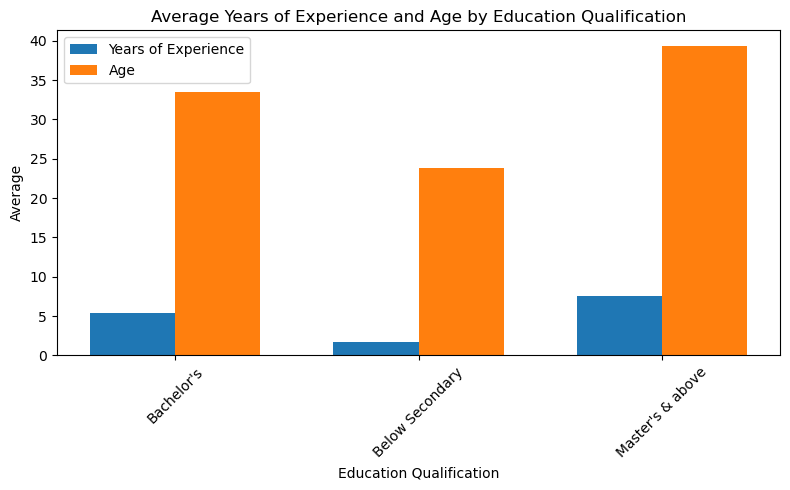

In [9]:
import matplotlib.pyplot as plt

education_stats = df_train.groupby('education').agg({
    'length_of_service': 'mean',
    'age': 'mean'
}).reset_index()


plt.figure(figsize=(8, 5))
bar_width = 0.35
positions = range(len(education_stats))
plt.bar(positions, education_stats['length_of_service'], bar_width, label='Years of Experience')
plt.bar([pos + bar_width for pos in positions], education_stats['age'], bar_width, label='Age')

plt.xlabel('Education Qualification')
plt.ylabel('Average')
plt.title('Average Years of Experience and Age by Education Qualification')
plt.xticks([pos + bar_width / 2 for pos in positions], education_stats['education'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
df_train.loc[df_train['education'].sample(frac=0.1).index, 'education'] = np.nan


def impute_education_based_on_experience(age, length_of_service):
    if length_of_service >= 2 and length_of_service <= 5:
        return "Bachelor's"
    elif length_of_service < 2 and age < 25:
        return "Below Secondary"
    elif age >= 25 and age < 33:
        return "Bachelor's"
    elif length_of_service >= 5 and age >= 33:
        return "Master's & above"
    else:
        return "Bachelor's"


df_train['education_imputed'] = df_train.apply(lambda row: impute_education_based_on_experience(row['age'], row['length_of_service']) if pd.isnull(row['education']) else row['education'], axis=1)

df_train.loc[df_train['education'].isnull(), 'education'] = df_train['education_imputed']

df_train.drop(columns='education_imputed', inplace=True)

is_promoted    377
dtype: int64

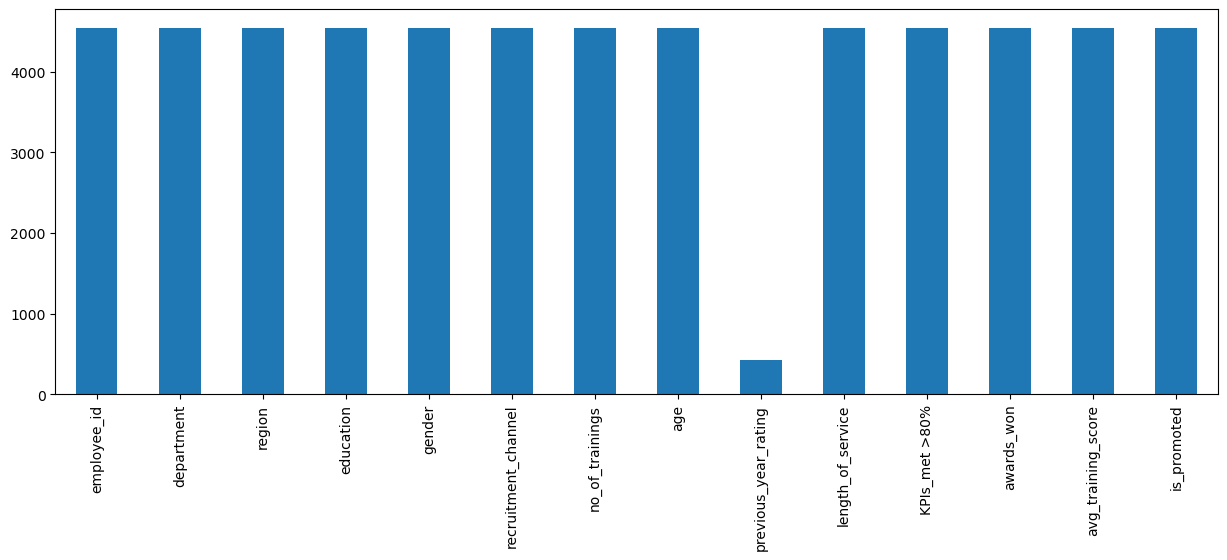

In [11]:
plt.subplots(figsize=(15,5))
df_train[df_train.length_of_service == 1].count().plot.bar()
df_train[df_train.length_of_service == 1].count()
#as we can see there are a lot of missed values in first year of service
#so we can fill them by 1, but its not fair to all first year employees, 
#so we should explore how many people promote in first year and choose optimal value to fill

first_year = df_train[(df_train.length_of_service == 1) & (df_train.is_promoted == 1)]
first_year[['is_promoted']].count()
#in first year only 377 of 4547 was promoted, this is not bad, so we couldn't say, that they have 1 previous_year_rating

In [12]:
first_year.previous_year_rating.value_counts()
#as we can see there are first year employees, who didn't get 5, but was promoted, so i think, that we should fill
#this nan column with 4 for people, who was promoted and by 3, who wasn't

4.0    16
5.0    11
3.0     9
2.0     2
Name: previous_year_rating, dtype: int64

In [13]:
#we filled nan values with 4, where employee worked for a year and get a promotion
#and we filled nan values with 3, where employee worked for a year and didn't get a promotion
df_train[(df_train.length_of_service == 1) & (df_train.is_promoted == 1)] = df_train[(df_train.length_of_service == 1) & (df_train.is_promoted == 1)].fillna(value = 4)
df_train[(df_train.length_of_service == 1) & (df_train.is_promoted == 0)] = df_train[(df_train.length_of_service == 1) & (df_train.is_promoted == 0)].fillna(value = 3)

In [14]:
df_train.previous_year_rating.isna().sum()

0

In [15]:
#as we can see there are no nan values in rating score
df_train.isna().sum()


employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

now we don't have nan values at all

# Handling outliers
In this part we will explore how many outliers we have. Outliers can be only in integer columns. We will cut such columns as age, previous_year_rating, length_of_service and etc., where we can't have outliers at all. But we will check avg_training_score. 

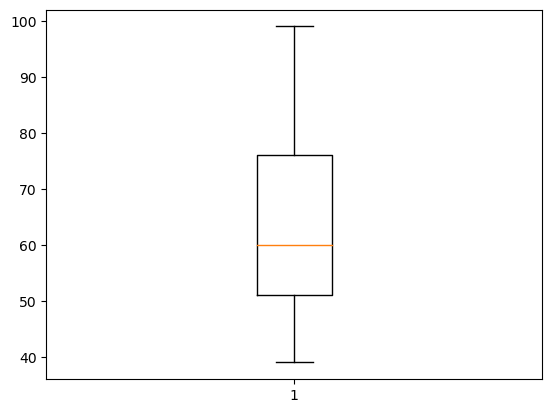

In [16]:
plt.boxplot(x = df_train.avg_training_score)
plt.show()

In [17]:
df_train.avg_training_score.min()
print(' Max:', df_train.avg_training_score.max(),'\n','Min:', df_train.avg_training_score.min())

 Max: 99 
 Min: 39


# Performing EDA

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won            54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [19]:
df_train['KPIs_met >80%'].value_counts()

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

## Employees Based on KPI Achievement by Department

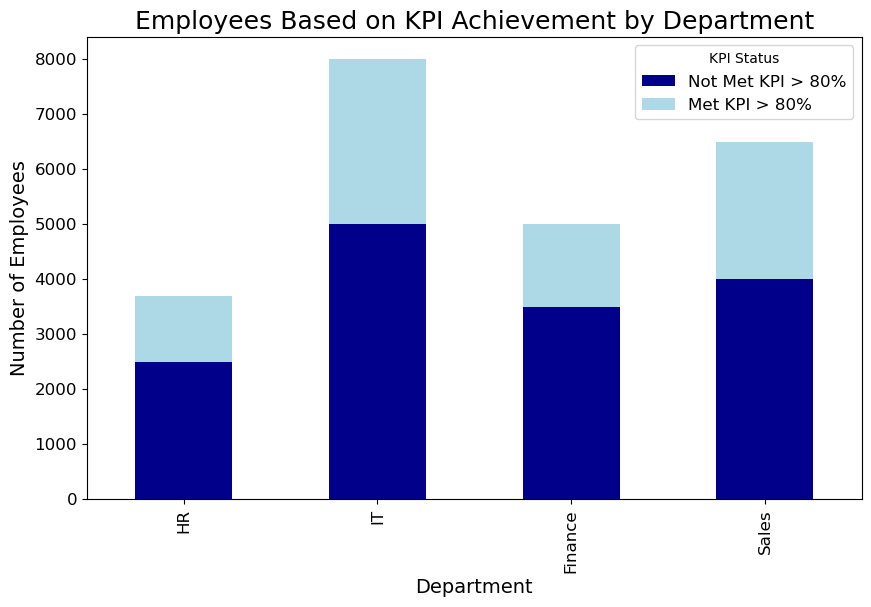

In [20]:
# Define the colors for the bar chart
colors = ['darkblue', 'lightblue']

data = pd.DataFrame({'Department': ['HR', 'IT', 'Finance', 'Sales'],
                     'Not Met KPI > 80%': [2500, 5000, 3500, 4000],
                     'Met KPI > 80%': [1200, 3000, 1500, 2500]})

plt.rcParams['figure.figsize'] = (10, 6)
data.plot(x='Department', kind='bar', stacked=True, color=colors, fontsize=12)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)
plt.title('Employees Based on KPI Achievement by Department', fontsize=18)
plt.legend(title='KPI Status', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Distribution of Length of Service among Employees

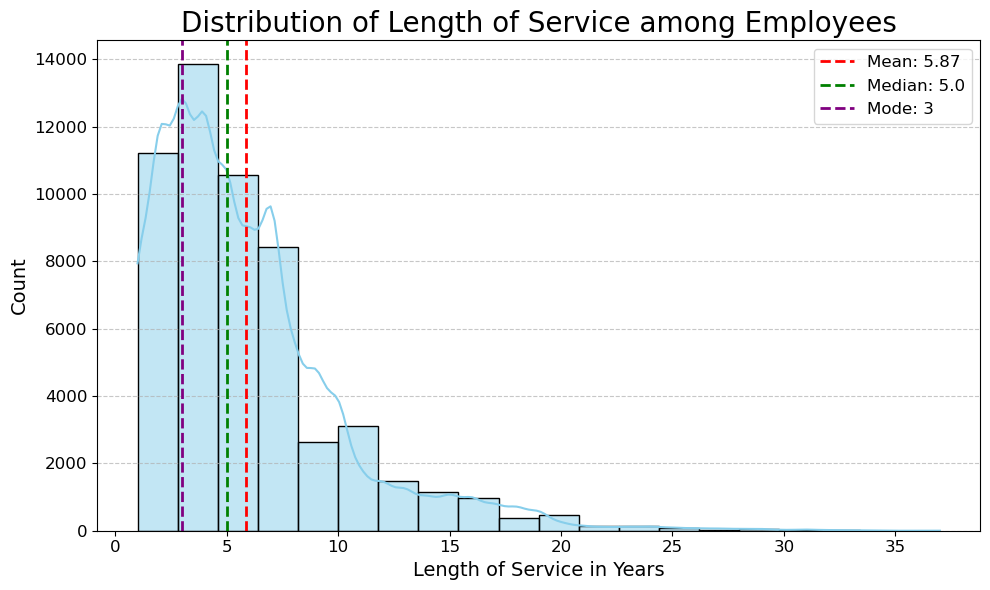

In [21]:


# Assuming you have the data loaded into 'train' DataFrame

plt.figure(figsize=(10, 6))
sns.histplot(df_train['length_of_service'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Length of Service among Employees', fontsize=20)
plt.xlabel('Length of Service in Years', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add vertical lines for mean, median, and mode
mean_service = df_train['length_of_service'].mean()
median_service = df_train['length_of_service'].median()
mode_service = df_train['length_of_service'].mode()[0]
plt.axvline(mean_service, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_service:.2f}')
plt.axvline(median_service, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_service}')
plt.axvline(mode_service, color='purple', linestyle='dashed', linewidth=2, label=f'Mode: {mode_service}')

plt.legend(fontsize=12, loc='upper right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Distribution of Previous Year Rating of the Employees


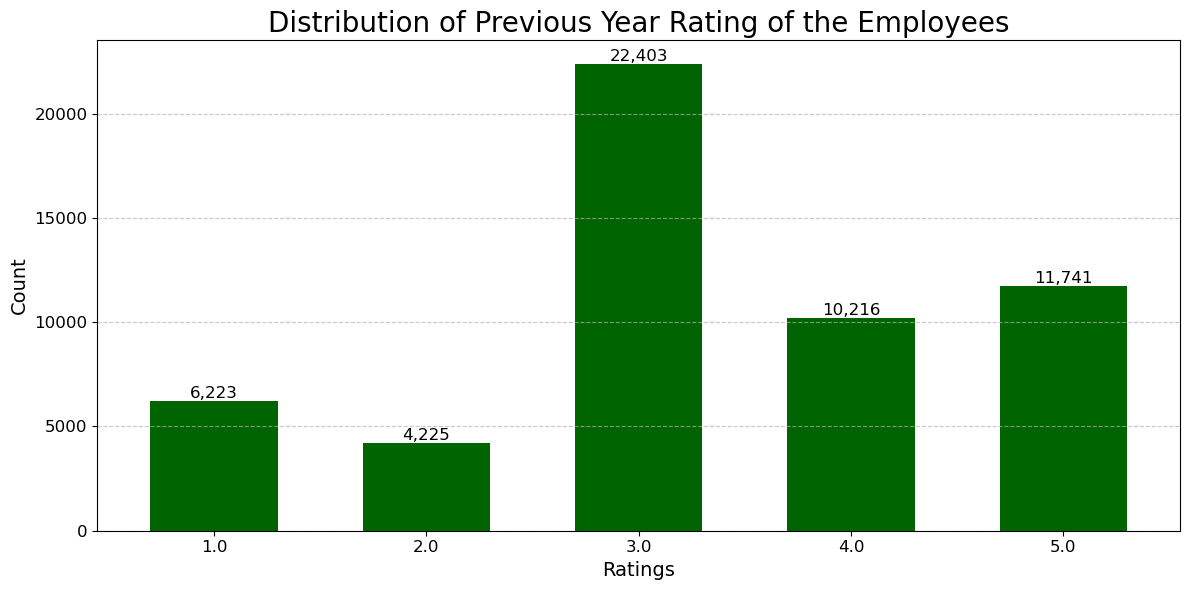

In [22]:
plt.figure(figsize=(12, 6))
ax = df_train['previous_year_rating'].value_counts().sort_index().plot.bar(color='darkgreen', width=0.6)

plt.title('Distribution of Previous Year Rating of the Employees', fontsize=20)
plt.xlabel('Ratings', fontsize=14)
plt.ylabel('Count', fontsize=14)


for p in ax.patches:
    ax.annotate(f"{p.get_height():,}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Distribution of Age of Employees

C:\Users\anchi\AppData\Local\Temp\ipykernel_19864\88382618.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['age'], color='red', kde=False, hist_kws={'alpha': 0.8, 'edgecolor':'black'})
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


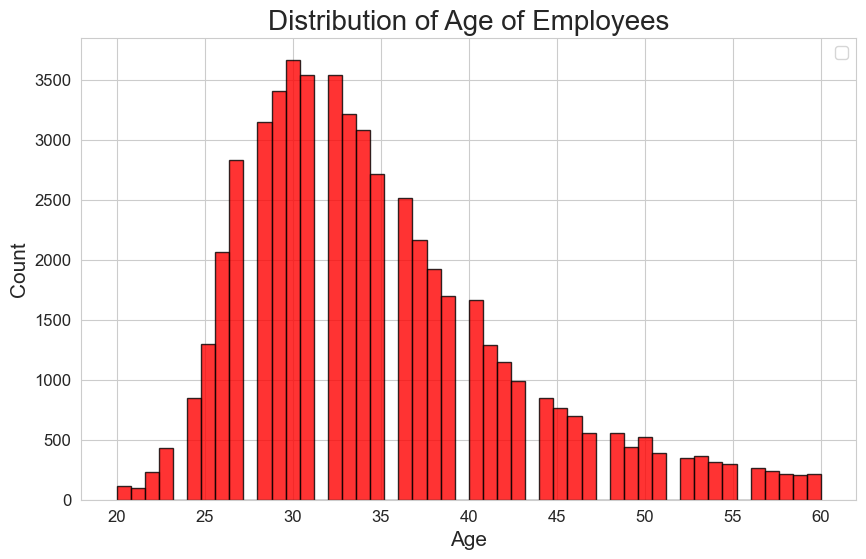

In [23]:

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.distplot(df_train['age'], color='red', kde=False, hist_kws={'alpha': 0.8, 'edgecolor':'black'})
plt.title('Distribution of Age of Employees', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


## Distribution of Education by Recruitment Channel

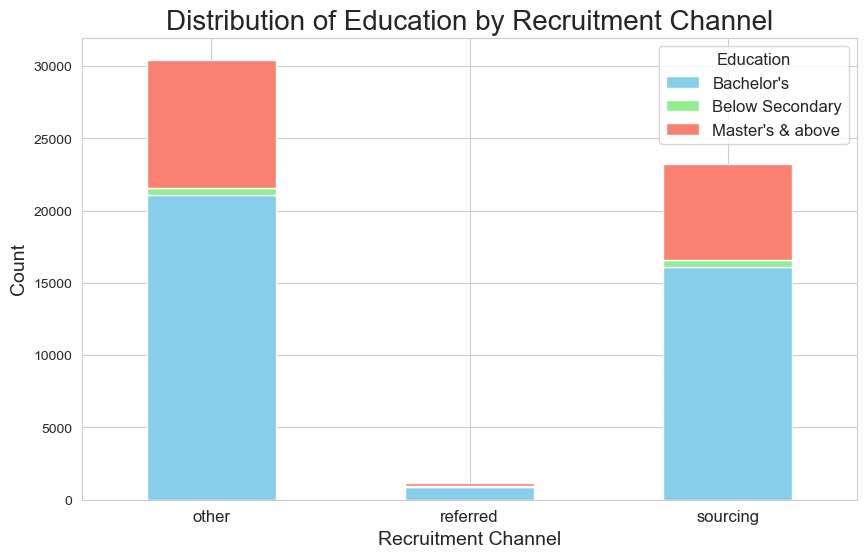

In [24]:
cross_table = pd.crosstab(df_train['recruitment_channel'], df_train['education'])


colors = ['skyblue', 'lightgreen', 'salmon']
cross_table.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))
plt.title('Distribution of Education by Recruitment Channel', fontsize=20)
plt.xlabel('Recruitment Channel', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Education', fontsize=12, title_fontsize=12)
plt.show()


## A Pie Chart Representing sex ratio

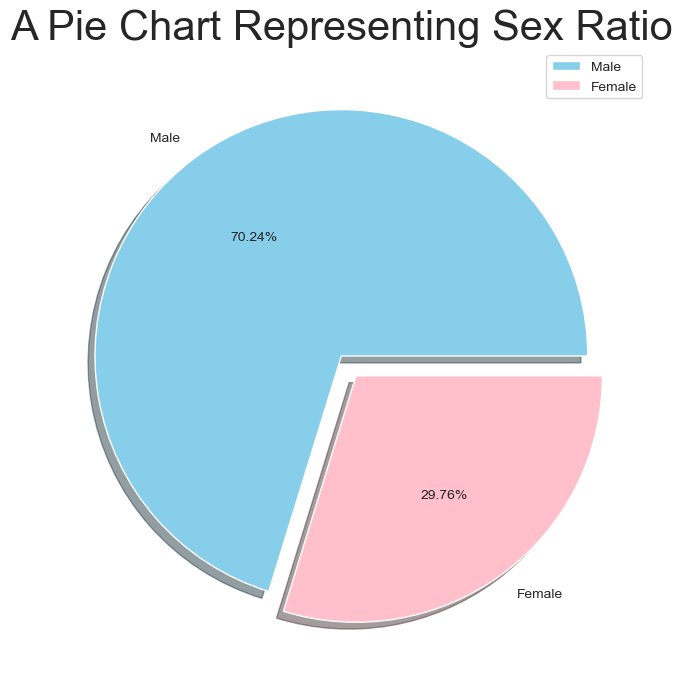

In [25]:

size = [38496, 16312]
labels = "Male", "Female"
colors = ['skyblue', 'pink']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Sex Ratio', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

## Count of Promoted Employees by Region

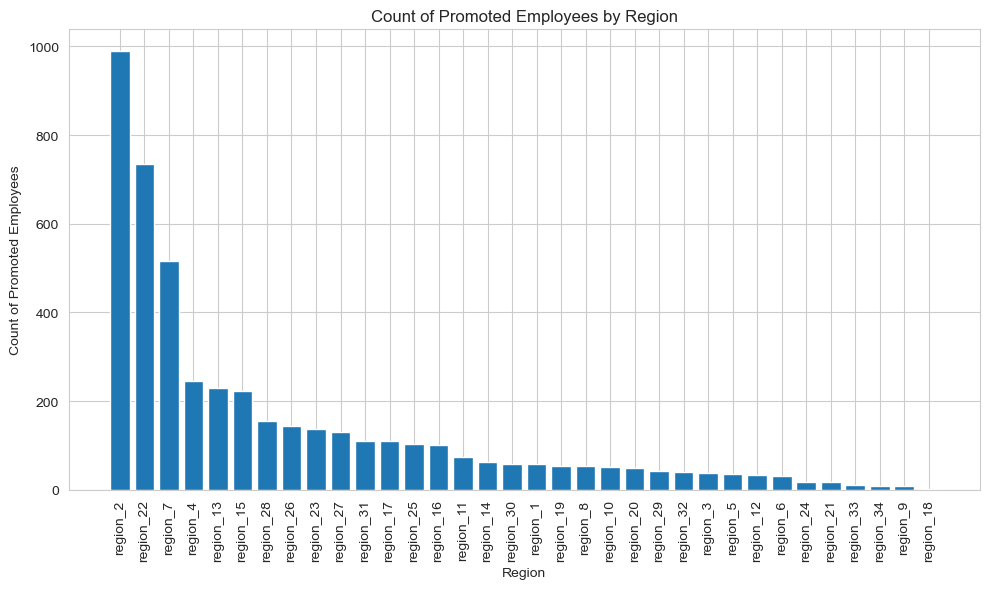

In [26]:
# Group the data by the "region" column and count the occurrences of 1 in the "is_promoted" column for each group
promoted_by_region = df_train.groupby('region')['is_promoted'].sum().reset_index()

# Rename the columns for better understanding
promoted_by_region.rename(columns={'is_promoted': 'count_promoted'}, inplace=True)

# Sort the DataFrame in descending order based on the count_promoted column
promoted_by_region_sorted = promoted_by_region.sort_values(by='count_promoted', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(promoted_by_region_sorted['region'], promoted_by_region_sorted['count_promoted'])
plt.xlabel('Region')
plt.ylabel('Count of Promoted Employees')
plt.title('Count of Promoted Employees by Region')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Looking at the Dependency of Training Score in promotion


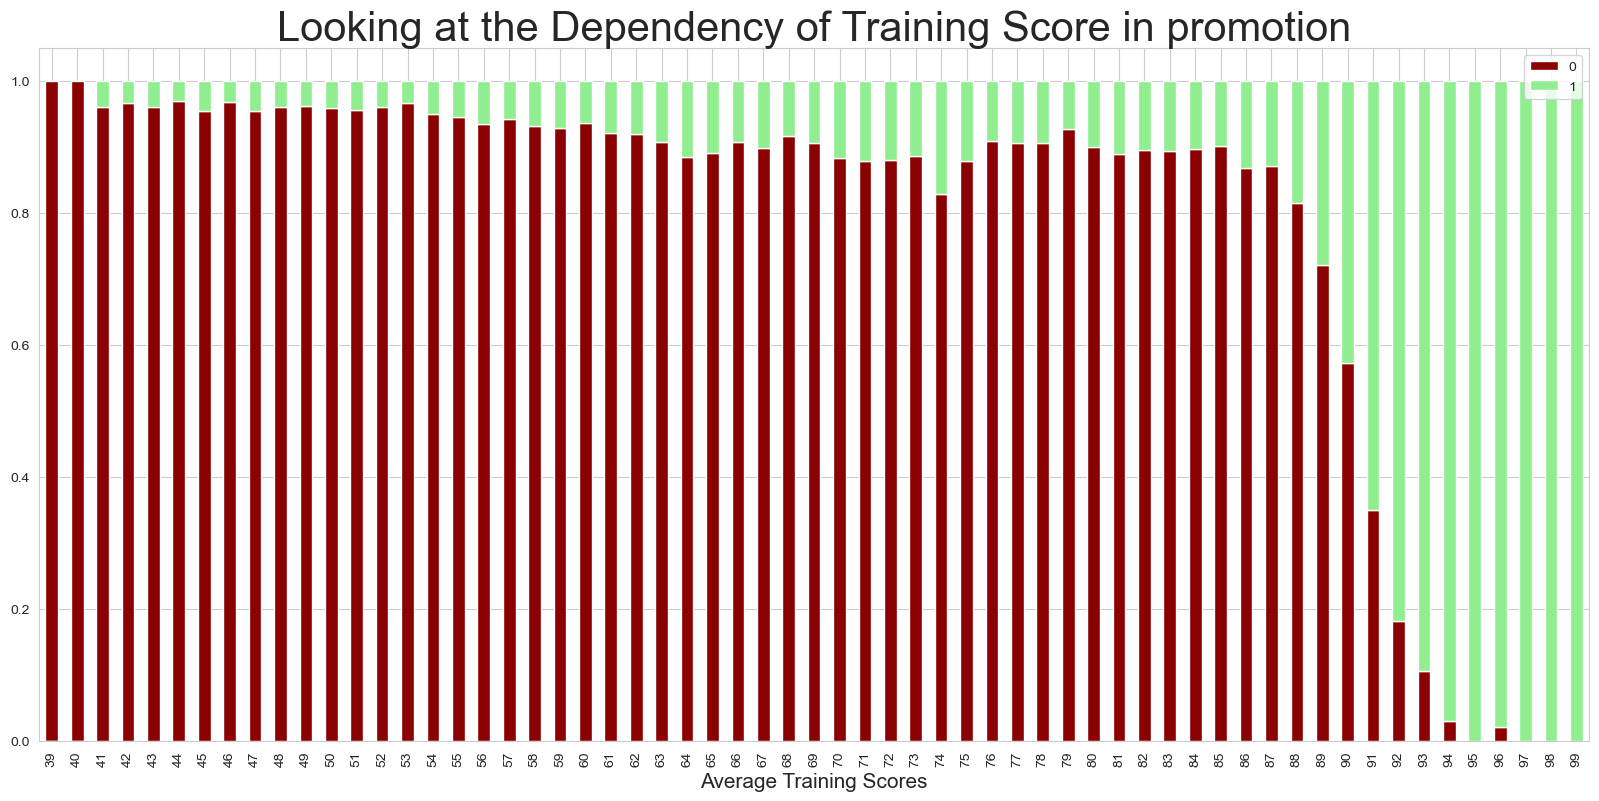

In [27]:
# scatter plot between average training score and is_promoted

data = pd.crosstab(df_train['avg_training_score'], df_train['is_promoted'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 9), color = ['darkred', 'lightgreen'])

plt.title('Looking at the Dependency of Training Score in promotion', fontsize = 30)
plt.xlabel('Average Training Scores', fontsize = 15)
plt.legend()
plt.show()

# Performing Feature Engineering

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won            54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


## Separate categorical and numerical columns

In [30]:
categorical_columns = df_train.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the lists
print("Categorical Columns:")
print(categorical_columns)
print("\nNumerical Columns:")
print(numerical_columns)

Categorical Columns:
['department', 'region', 'education', 'gender', 'recruitment_channel']

Numerical Columns:
['employee_id', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won', 'avg_training_score', 'is_promoted']


In [31]:
#firstly we need to create feature, which describe age, when employee started his career at company
df_train['career_start_age'] = df_train.age - df_train.length_of_service

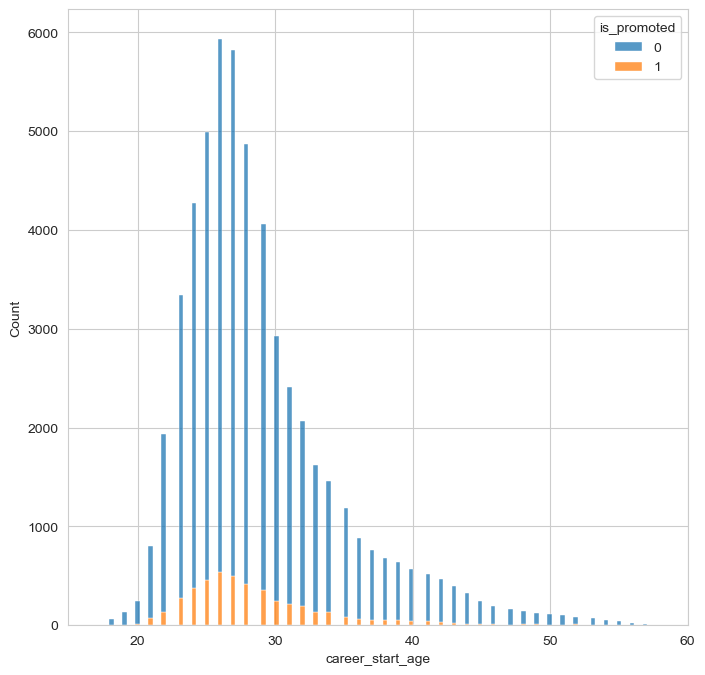

In [32]:
#let's look how it's connected with promotion
sns.histplot(x = 'career_start_age', hue = 'is_promoted', data = df_train, multiple= 'stack')
plt.show()

As we can see, it's a strong correlation between promotion and career start age feature, in my opinion it would help us to built good model

# Feature scaling
Here we will scale our numeric features for better work of our model. As we can see most of our features is categorical. Age and start age career included. Only feature, which we will scale is avg_training_score.

In [33]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
x = df_train

In [34]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    
#this class i've got from stackoverflow, thanks to this user https://stackoverflow.com/users/1610342/pricehardman  

In [35]:
df_train = MultiColumnLabelEncoder(columns = [
    'department', 
    'region', 
    'education', 
    'gender', 
    'recruitment_channel'
]).fit_transform(x)

# Afterword
We transformed our data, we scaled, filled na, convert features, created new. But we did it only on our train dataset.

# Model building 
Here we will built our model. 

In [36]:
#importing main data analysis libraries  
import pandas as pd 
import numpy as np
#importing main visualization libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%matplotlib inline 

For this problem we have several models, but I think we will stop on Random Forest Classifier, SVC, SGD, Gradient Boosting Classification and K-Neighbors Classifier. Firstly we will teach them, check their performance. After this we will look which errors they did, choose 3 models and tune them. Also we will try ensemble models, like voting, they can have better performance than single models.

In [37]:
#read prepared train data
train = pd.read_csv('train_dataset.csv')

In [38]:
#split our dataset into peaces

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train.drop(columns= 'is_promoted', axis = 1), 
    train['is_promoted'], 
    test_size=0.2,
    random_state = 42)

print(' x_train: ',X_train.shape, '\n',
      'y_train:',y_train.shape,'\n',
      'x_test:',X_test.shape,'\n',
      'y_test:',y_test.shape)

 x_train:  (43846, 13) 
 y_train: (43846,) 
 x_test: (10962, 13) 
 y_test: (10962,)


## Teaching models 
Here we will teach the most perspective models, but we only fit them.

### Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)

RandomForestClassifier()

### SVC

In [40]:
from sklearn.svm import SVC

sv_clf = SVC()

sv_clf.fit(X_train, y_train)

SVC()

### SGD

In [41]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()

sgd_clf.fit(X_train, y_train)

SGDClassifier()

### XGBoost

In [42]:
from xgboost.sklearn import XGBClassifier

xgb_clf = XGBClassifier()

xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### KNeightbors

In [43]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier()

kn_clf.fit(X_train, y_train)

KNeighborsClassifier()

## Checking performance
We need to check performance of our model. Our top priorities is high precision and accuracy score. Because it's very important to promote right employee and don't have a mistake. Recall is important too, but 25-30% will be fine. I think, that roc auc score should be about 45-55%. I'm telling about it, because we should choose some model to tune them.

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score


for clf in (rf_clf, sv_clf, sgd_clf, xgb_clf, kn_clf):
    y_pred = clf.predict(X_test)
    print(
        clf.__class__.__name__,
        '\n',
        'Accuracy score: ',accuracy_score(y_test, y_pred), '\n',
        'Precision score: ',precision_score(y_test, y_pred, zero_division = 1), '\n',
        'Recall score: ',recall_score(y_test, y_pred, zero_division = 1), '\n',
        'F1 score: ',f1_score(y_test, y_pred, zero_division = 1), '\n',
        'ROC AUC score: ',roc_auc_score(y_test, y_pred), '\n', 

    )

RandomForestClassifier 
 Accuracy score:  0.9373289545703338 
 Precision score:  0.8338368580060423 
 Recall score:  0.3039647577092511 
 F1 score:  0.4455205811138014 
 ROC AUC score:  0.6492471490953258 

SVC 
 Accuracy score:  0.9171683999270206 
 Precision score:  1.0 
 Recall score:  0.0 
 F1 score:  0.0 
 ROC AUC score:  0.5 

SGDClassifier 
 Accuracy score:  0.9195402298850575 
 Precision score:  0.8823529411764706 
 Recall score:  0.03303964757709251 
 F1 score:  0.06369426751592357 
 ROC AUC score:  0.5163208979878698 

XGBClassifier 
 Accuracy score:  0.9464513774858603 
 Precision score:  0.883054892601432 
 Recall score:  0.40748898678414097 
 F1 score:  0.5576488319517708 
 ROC AUC score:  0.7013076523337853 

KNeighborsClassifier 
 Accuracy score:  0.9135194307608101 
 Precision score:  0.3076923076923077 
 Recall score:  0.03524229074889868 
 F1 score:  0.0632411067193676 
 ROC AUC score:  0.5140404809622751 



So we have all scores of our models. In my opinion we should choose 2 or 3 top model, which we will tune and make better. Here it is Random Forest Classifier and Gradient Boosting Classifier.

## Model Tuning

### Random Forest Classifier

#### Grid Search CV 

In [45]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

In [46]:
rfc_search = RandomForestClassifier()

In [47]:
n_estimators = [32, 64, 128]
max_featurese = ['auto', 'sqrt', 'log2']
max_depth = [20, 25, 30, 35]
min_samples_split = 0.2
min_samples_leaf = [1, 2, 5, 10, 15]

grid_param = {
    'n_estimators': n_estimators,
    'max_features': max_featurese,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf
}

#### Random Search CV 

In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [49]:
rfc_search_rscv = RandomForestClassifier()

In [50]:
n_estimators = [32, 64, 128,  256]
max_featurese = ['auto', 'sqrt', 'log2']
max_depth = [32, 64, 128, 256]
min_samples_leaf = [1, 2, 5, 10, 15]
criterion = ['entropy', 'gini']
bootstrap = [True, False]

random_param = {
    'n_estimators': n_estimators,
    'max_features': max_featurese,
    'criterion' : criterion,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf
}

In [51]:
rfc_random_f = RandomizedSearchCV(estimator= rfc_search_rscv,
                               param_distributions= random_param,
                               cv = 5, n_jobs= -1, scoring= 'precision')

In [52]:
rfc_random_f.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [32, 64, 128, 256],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10, 15],
                                        'n_estimators': [32, 64, 128, 256]},
                   scoring='precision')

In [53]:
rfc_random_f.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=256, min_samples_leaf=15,
                       n_estimators=64)

In [54]:
rfc_random_s = RandomForestClassifier(criterion='entropy', max_depth=256, max_features='log2',
                       min_samples_leaf=10, n_estimators=64)

In [55]:
rfc_random_s.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=256, max_features='log2',
                       min_samples_leaf=10, n_estimators=64)

In [56]:
y_pred = rfc_random_s.predict(X_test)
print(
        rfc_random_s.__class__.__name__,
        '\n',
        'Accuracy score: ',accuracy_score(y_test, y_pred), '\n',
        'Precision score: ',precision_score(y_test, y_pred, zero_division = 1), '\n',
        'Recall score: ',recall_score(y_test, y_pred, zero_division = 1), '\n',
        'F1 score: ',f1_score(y_test, y_pred, zero_division = 1), '\n',
        'ROC AUC score: ',roc_auc_score(y_test, y_pred), '\n', 

    )

RandomForestClassifier 
 Accuracy score:  0.9359605911330049 
 Precision score:  0.9364406779661016 
 Recall score:  0.2433920704845815 
 F1 score:  0.38636363636363635 
 ROC AUC score:  0.6209500634897545 



### Comparison
Here we will compare all the results.

#### Without tuning:

 Accuracy score:  0.9374201787994891  \
 Precision score:  0.8284023668639053 \
 Recall score:  0.30837004405286345 \
 F1 score:  0.4494382022471911 \
 ROC AUC score:  0.6513005979166246 
 
 #### GridSearch:
 
 Accuracy score:  0.9377850757161103 \
 Precision score:  0.9346153846153846 \
 Recall score:  0.26762114537444937 \
 F1 score:  0.416095890410959 \
 ROC AUC score:  0.6329651380343503 
 
 #### RandomSearch:
 
 Accuracy score:  0.9362342638204707 \
 Precision score:  0.9336099585062241 \
 Recall score:  0.24779735682819384 \
 F1 score:  0.391644908616188 \
 ROC AUC score:  0.6231029752113916 

As we can see most efficient model is GridSearch , we increase our precision score from 82% to 93%, we lost 6% in our recall score, but it's more important to get the most accurate result. We don't want to promote wrong employees. So we will use this, instead without tuning model. So this model we will save.

## Gradient Boosting

### Research

Here we will explore, which parameter we should use. Gradient Boosting is good, but we should optimize our grid search. Thanks for this code for Mohtadi Ben Fraj, it was published on Medium.com(https://medium.com/@mohtedibf)

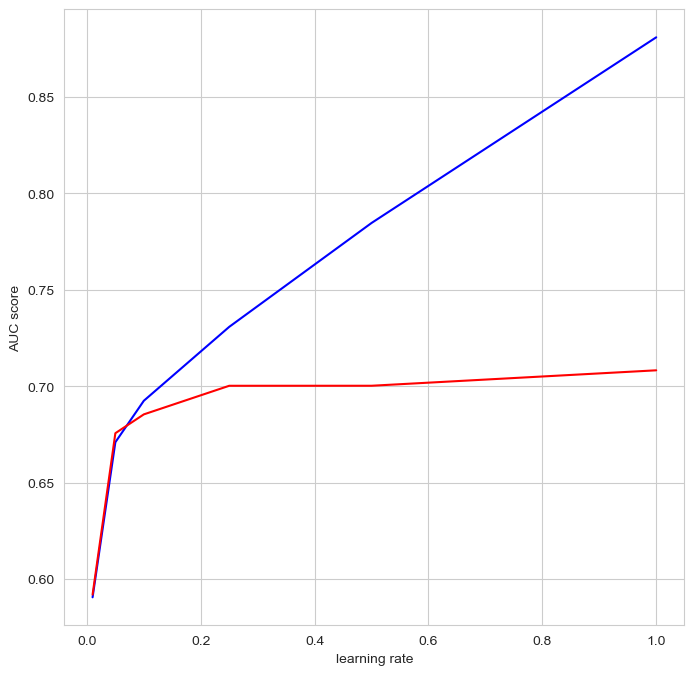

In [57]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []

for eta in learning_rates:
   model = XGBClassifier(learning_rate=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(learning_rates, train_results,'b', label='Train AUC')
line2, = plt.plot(learning_rates, test_results,'r', label='Test AUC')

plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

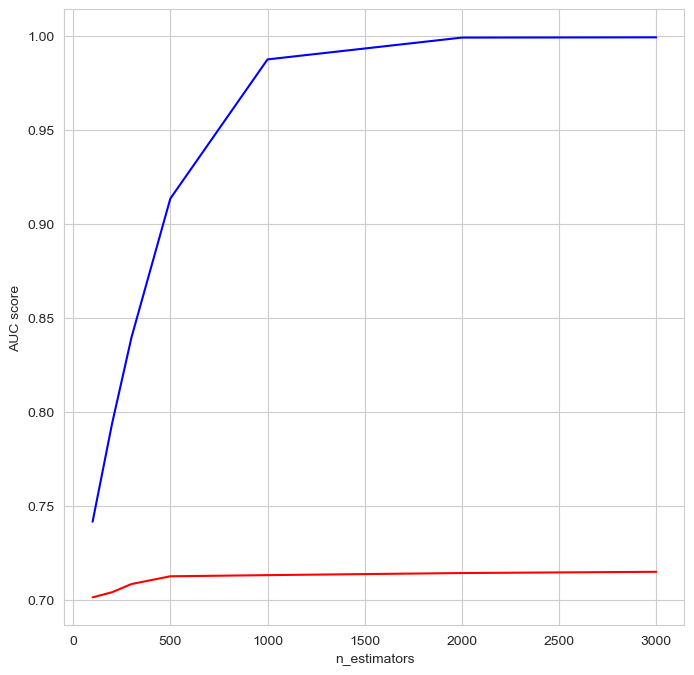

In [58]:
n_estimators = [100, 200, 300, 500, 1000, 2000, 3000]
train_results = []
test_results = []
for estimator in n_estimators:
   model = XGBClassifier(n_estimators=estimator)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')

plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

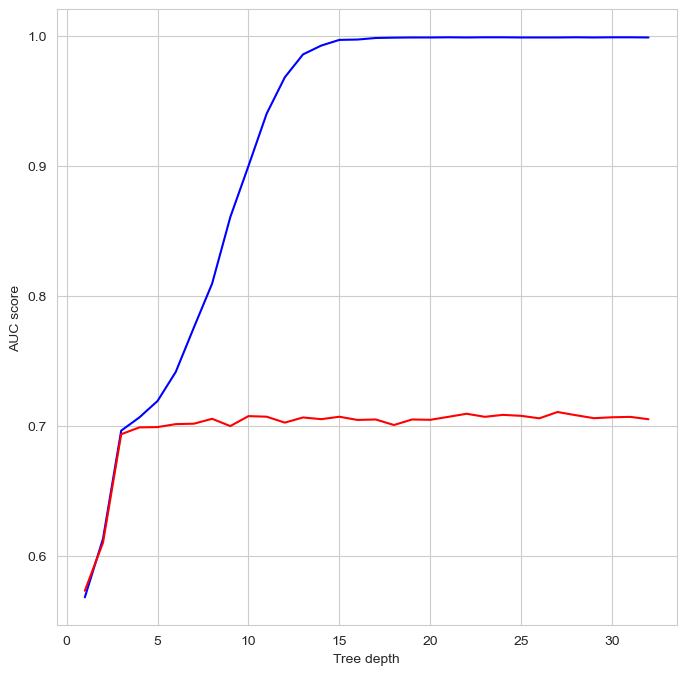

In [59]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   model = XGBClassifier(max_depth=int(max_depth))
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
    
    
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

[15:34:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[15:34:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[15:34:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[15:34:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[15:34:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_s

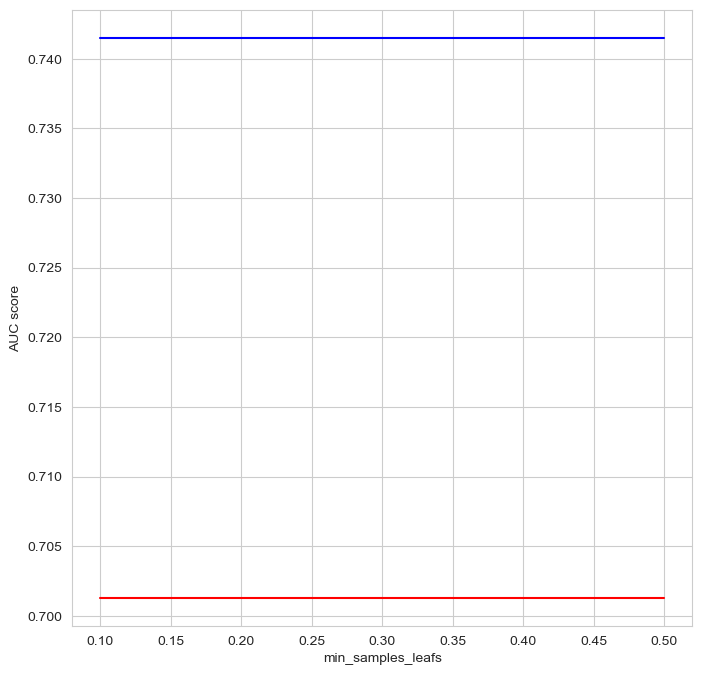

In [60]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   model = XGBClassifier(min_samples_leaf=min_samples_leaf)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')

plt.ylabel('AUC score')
plt.xlabel('min_samples_leafs')
plt.show()

#### Grid Search

In [61]:
xgb_clf_grid = XGBClassifier()

In [62]:
n_estimators = [2000]
learning_rate = [0.35 ,0.25]
max_depth = [5, 7]

grid_param = {
    'n_estimators': n_estimators,
    'learning_rate': learning_rate,
    'max_depth': max_depth,
}

In [63]:
xgb_clf_grid_f = GridSearchCV(estimator= xgb_clf_grid,  param_grid= grid_param, cv = 5, scoring= 'roc_auc')

In [64]:
xgb_clf_grid_f.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...one,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.35, 0.25], 'max_depth': [5, 7],
                         'n_estimators': [2000]},
             scoring='roc_auc')

In [65]:
xgb_clf_grid_f.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=2000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [66]:
xgb_clf_grid_s = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5, min_child_weight=1,
              n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
xgb_clf_grid_s.fit(X_train, y_train )

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy=None, importance_type='gain',
              interaction_constraints='', learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=5, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=2000, n_jobs=0,
              num_parallel_tree=1, predictor=None, random_state=0, ...)

In [68]:
y_pred = xgb_clf_grid_s.predict(X_test)
print(
        xgb_clf_grid_s.__class__.__name__,
        '\n',
        'Accuracy score: ',accuracy_score(y_test, y_pred), '\n',
        'Precision score: ',precision_score(y_test, y_pred, zero_division = 1), '\n',
        'Recall score: ',recall_score(y_test, y_pred, zero_division = 1), '\n',
        'F1 score: ',f1_score(y_test, y_pred, zero_division = 1), '\n',
        'ROC AUC score: ',roc_auc_score(y_test, y_pred), '\n', 
    )

XGBClassifier 
 Accuracy score:  0.9351395730706076 
 Precision score:  0.6638935108153078 
 Recall score:  0.43942731277533037 
 F1 score:  0.5288270377733598 
 ROC AUC score:  0.7096679034535096 



In [69]:
testing = pd.read_csv('test_dataset.csv')

In [70]:
testing.isna().sum()
#we need to look how many was lost, not bad, but we should fix it

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [71]:
#we got table with nan values in education part
edu_nan_1 = testing.drop(columns= ['previous_year_rating'], axis = 1)
edu_nan_2 = edu_nan_1[edu_nan_1.isna().any(axis=1)]

In [72]:
testing[testing.department == 'Sales & Marketing'].education.value_counts()

Bachelor's          4818
Master's & above    1834
Name: education, dtype: int64

In [73]:
#filling na values with "Bachelor's"
testing['education'] = testing['education'].fillna(value = ("Bachelor's"))

In [74]:

testing.isna().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

Now we don't have nan values in education column

In [76]:
mode_previous_year_rating = testing['previous_year_rating'].mode().iloc[0]  # In case of multiple modes, choose the first one

# Replace missing values in "previous_year_rating" with the chosen imputation value (mean, median, or mode)
# Let's use mean for this example
testing['previous_year_rating'].fillna(mode_previous_year_rating, inplace=True)
print(testing.isnull().sum())

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64


In [77]:
employee_id = testing.employee_id
testing = testing.drop(columns= ['employee_id'])
testing = testing.rename(columns = {'awards_won?':'awards_won'})
#we are dropping employee id, because it's not important feature, also

In [78]:
#firstly we need to create feature, which describe age, when employee started his career at company
testing['career_start_age'] = testing.age - testing.length_of_service

In [80]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
x = testing

In [81]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    
#this class i've got from stackoverflow, thanks to this user https://stackoverflow.com/users/1610342/pricehardman  

testing = MultiColumnLabelEncoder(columns = [
    'department', 
    'region', 
    'education', 
    'gender', 
    'recruitment_channel'
]).fit_transform(x)

In [82]:
testing

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won,avg_training_score,career_start_age
0,8,18,0,1,2,1,24,3.0,1,1,0,0.633333,23
1,2,28,0,0,0,1,31,3.0,5,0,0,0.200000,26
2,7,4,0,1,0,1,31,1.0,4,0,0,0.133333,27
3,5,11,0,0,0,3,31,2.0,9,0,0,0.433333,22
4,1,21,0,1,2,1,30,4.0,7,0,0,0.366667,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,3,11,1,1,2,1,24,3.0,1,0,0,0.366667,23
23486,8,17,0,1,2,1,31,3.0,7,0,0,0.583333,24
23487,2,7,0,0,2,1,26,4.0,4,0,0,0.183333,22
23488,5,24,0,1,2,3,27,3.0,1,0,0,0.516667,26


In [83]:
train

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won,avg_training_score,is_promoted,career_start_age
0,7,31,2,0,2,1,35,5.0,8,1,0,0.166667,0,27
1,4,14,0,1,0,1,30,5.0,4,0,0,0.350000,0,26
2,7,10,0,1,2,1,34,3.0,7,0,0,0.183333,0,27
3,7,15,0,1,0,2,39,1.0,10,0,0,0.183333,0,29
4,8,18,0,1,0,1,45,3.0,2,0,0,0.566667,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,8,5,0,1,2,1,48,3.0,17,0,0,0.650000,0,31
54804,4,19,2,0,0,1,37,2.0,6,0,0,0.283333,0,31
54805,0,0,0,1,0,1,27,5.0,3,1,0,0.666667,0,24
54806,7,33,0,1,2,1,29,1.0,2,0,0,0.100000,0,27


In [84]:
pred_test = xgb_clf.predict(testing)

In [85]:
pred_test

array([0, 0, 0, ..., 0, 0, 1])

In [86]:
import numpy as np

# Example NumPy array
np_array = pred_test

# Calculate the counts of unique elements
unique_elements, counts = np.unique(np_array, return_counts=True)

# Print the contingency table
print("Contingency Table:")
for element, count in zip(unique_elements, counts):
    print(f"{element}: {count}")

Contingency Table:
0: 22703
1: 787


In [87]:
np.size(pred_test)

23490

### Comparison
Here we will compare all the results.

#### Without tuning:

 Accuracy score:  0.9464513774858603 \
 Precision score:  0.883054892601432  \
 Recall score:  0.40748898678414097 \
 F1 score:  0.5576488319517708 \
 ROC AUC score:  0.7013076523337853 
 
 #### GridSearch:
 
 Accuracy score:  0.9351395730706076 \
 Precision score:  0.6638935108153078\
 Recall score:  0.43942731277533037 \
 F1 score:  0.5288270377733598\
 ROC AUC score:  0.7096679034535096

### Results

As we can see our grid search didn't help to improve our model. But results without grid search is good. We have a high rate of precision, 40% of recall and high accuracy.

## Conclusion

In this project we explore how people get a promotion. We built two good models, which describe, why and how people get their promotion. In my opinion we should use XGBoost model. It works good. In real project we would tune it more, but it won't let us significant difference.